# Fourier Transform
## Prepared by Maxim Khagay
### School of Science and Technology, Nazarbayev University

## Abstract
This report performs the Fourier transform of function $y(t) = cos(\frac{2\pi}{T}t)$ at equidistant points over time interval from $0$ to $N_pT$, where T is constant period. We have $N_0$ equidistant points per each period. By adding random numbers on these points we will apply Fast Fourier Transform (FFT), after that we will filter out the random noise from the Fourier transform. Finally in report you will see application of inverse Fourier transform. We will compare the values of the original function and with the obtained data. Also, in this report we will use different $N_p$ and $N_0$ and analyze those cases.  
## Introduction
The Fourier Transform is a powerful method of decomposing a time function. Inverse Fourier Transform is useful to turn the Fourier transform into the time function again. Both are used in reducing the noise in audio, video, etc.   

### Theory
From Chapra and Canale's book we took these formulas for discrete $2^m$ values:

Fourier transform
\begin{equation*}
    F_k = \sum_{n = 0}^{N - 1}f_ne^{iw_0kn}
\end{equation*}

Inverse Fourier transform
\begin{equation*}
    f_n = \frac{1}{N}\sum_{k = 0}^{N-1}F_ke^{iwkn} 
\end{equation*}

To calculate discrete Fourier transform in a faster way let's use a faster method - Fast Fourier Transform. Asymptotics of a such method - $N\log_2N$. FFT works in the following way - formula of N points decreases to formula of N/2 points, after that it obtains odd and even conditions and recursively repeat previous operation. More deep description you can see in Chapra and Canale's book. We use such formulas:

To decrease from N to N/2 points.
\begin{equation*}
    F_k = \sum_{n = 0}^{N/2-1}(f_n+(-1)^{k}f_{n+N/2})e^{-i2 \pi k\frac{n}{N}}
\end{equation*}

To obtain even and odd $F_k$
\begin{equation*}
    F_{2k} = \sum_{n = 0}^{N/2-1}(f_n+f_{n+N/2})e^{-i2 \pi(2k)n/N}
\end{equation*}

\begin{equation*}
    F_{2k+1} = \sum_{n = 0}^{N/2-1}(f_n-f_{n+N/2})W^nW^{2kn}
\end{equation*}
where 
$W = e^{-i(2\pi/N)}$
Also, from all calculations we will use just real part (skip imaginary) of complex numbers.

### Error
To calculate error we will use formula of standard error:
\begin{equation*}
error = \sqrt\frac{\sum(f(x) - y_i)^2}{n}
\end{equation*}
As we use random noise results will be different and we can't say anything about error. So we will run each method 100 times and take average error, after that we can see behavior of error. 

## Formulation of the problem

First of all we need to obtain results $N_p = 4$ and $N_0 = 32$

After that we will make the same operations for $N_0 = 16$ and $N_0 = 8$ and discuss about behavior of error.

The same for $N_p = 2$, $N_p = 8$ and $N_p = 16$.

## Methods

Here we represent all functions needed: original functi on of $cos$, fast Fourier transfofm, inverse Fourier transform and main $report$ function with arguments $N_p$ and $N_0$ will provide graphs and errors. Also, we use constant $T = 0.5s$ 

In [358]:
%matplotlib inline
from matplotlib.pyplot import *
from math import pi
from math import cos
from math import sqrt
from time import time
from cmath import exp, pi
from random import random, seed
import numpy as np

def f(t):
    return cos(2*pi/T*t)

def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]
    
def inv(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]
    
def report(N0, NP, w):
    N = N0 * NP
    T = 0.5
    dt = T / N0
    x = np.array(np.zeros(N))
    y = np.array(np.zeros(N))
    for i in range(N):
        x[i] = i* dt
        y[i] = f(x[i])

    if (w):
        print("It is graph of original function")
        print("And make a noise on it")
        plot(x, y)
    
    yy = np.array(np.zeros(N))
    for i in range(N):
        yy[i] = y[i]+(random()*0.44 - 0.22)
    if (w):
        plot(x, yy)
        show()

    yf = np.array(fft(yy)).real
    if (w and N == 128):
        print("Apply fast Fourier transform")
        plot(x, yf)
        show()

    for i in range(N):
        if (yf[i] < 10):
            yf[i] = 0
        if (N > 128 and yf[i] < 50):
            yf[i] = 0
            
    if (w):
        print("Filter out the random noise from the FFT")
        plot(x, yf)
        show()
    
    yt = np.array(inv(yf)).real / N
    if (w):
        print("Finaly, we obtain inverse Fourier transform")
        plot(x, yt)
        show()

    err1 = 0.0
    
    for i in range(N):
        err1 += (y[i] - yt[i])**2
    err1 = sqrt(err1 / N)
    if (w == False):
        return err1

Let's see results of $N_0$ = 32 and $N_p = 4$

It is graph of original function
And make a noise on it


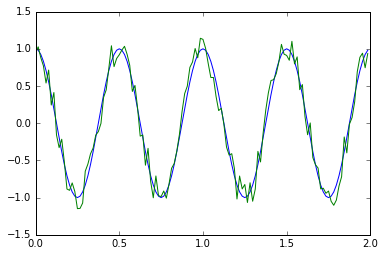

Apply fast Fourier transform


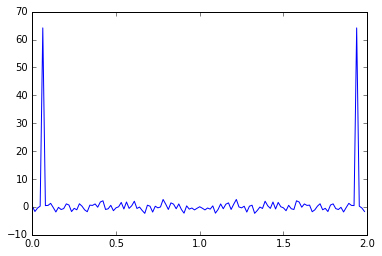

Filter out the random noise from the FFT


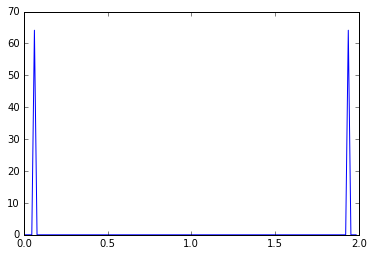

Finaly, we obtain inverse Fourier transform


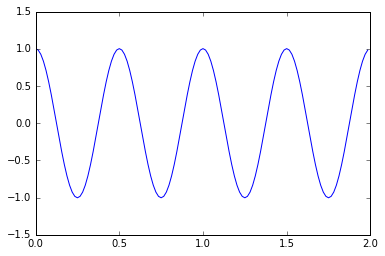

Average standard error for the values of original function -  0.01002060448314268


In [359]:
report(32, 4, True)
err = 0
for i in range(100):
    err += report(32, 4, False)
err /= 100
print("Average standard error for the values of original function - ", err)

Let's see results of $N_0 = 16$ and $N_p = 4$

It is graph of original function
And make a noise on it


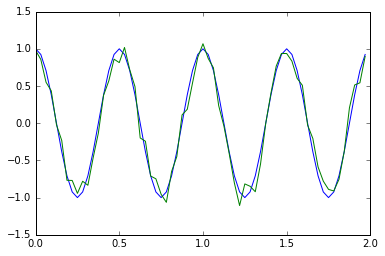

Filter out the random noise from the FFT


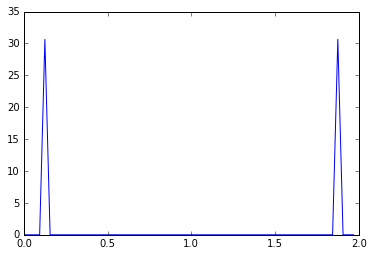

Finaly, we obtain inverse Fourier transform


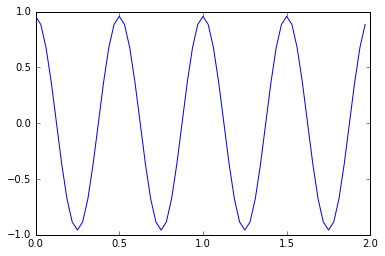

In [360]:
report(16, 4, True)

Let's see results of $N_0 = 8$ and $N_p = 4$

It is graph of original function
And make a noise on it


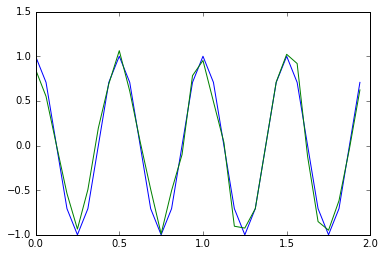

Filter out the random noise from the FFT


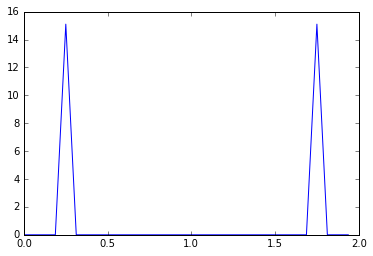

Finaly, we obtain inverse Fourier transform


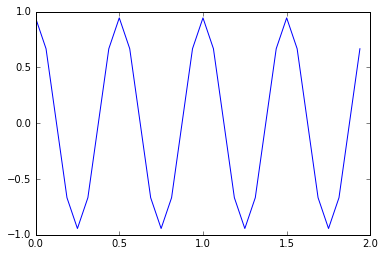

In [361]:
report(8, 4, True)

Here we take average error and can see results

In [362]:
er1 = 0;
er2 = 0;
for i in range(100):
    er1 += report(16, 4, False)
    er2 += report(8, 4, False)
er1 /= 100
er2 /= 100
print("Data compare:\n")
print("N0 = 16")
print("Average standard error of original function - ", er1)
print("N0 = 8")
print("Average standard error of original function - ", er2)

Data compare:

N0 = 16
Average standard error of original function -  0.012865636044846562
N0 = 8
Average standard error of original function -  0.01633417371607407


Let's see results of $N_p = 2$

It is graph of original function
And make a noise on it


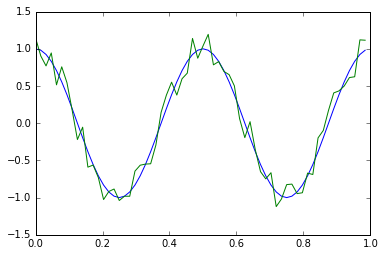

Filter out the random noise from the FFT


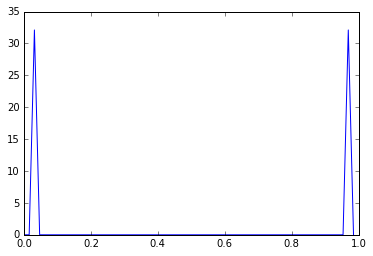

Finaly, we obtain inverse Fourier transform


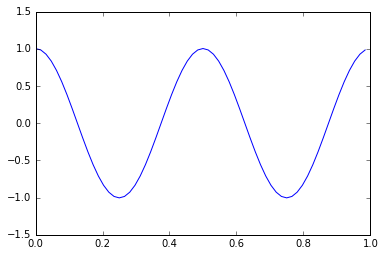

In [363]:
report(32, 2, True)

Let's see results of $N_p = 8$ 

It is graph of original function
And make a noise on it


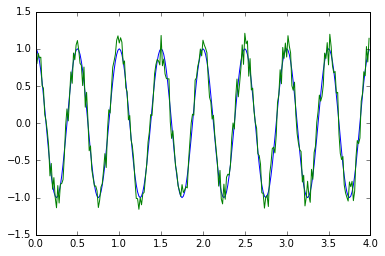

Filter out the random noise from the FFT


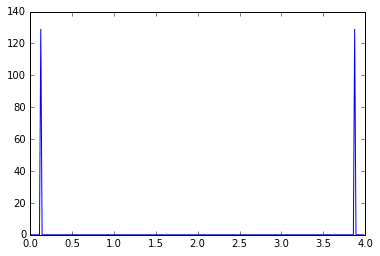

Finaly, we obtain inverse Fourier transform


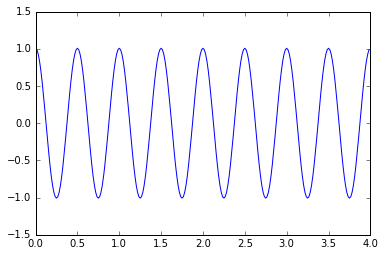

In [364]:
report(32, 8, True)

Let's see results of $N_p = 16$ 

It is graph of original function
And make a noise on it


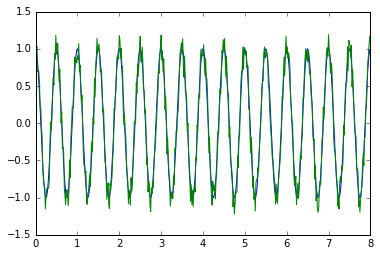

Filter out the random noise from the FFT


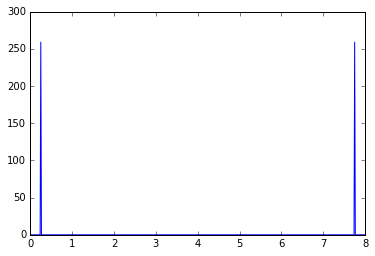

Finaly, we obtain inverse Fourier transform


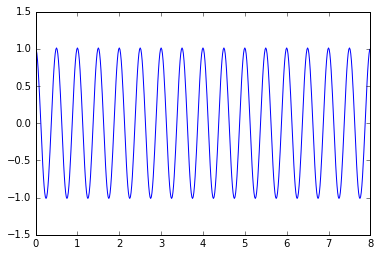

In [365]:
report(32, 16, True)

In [366]:
er1 = 0;
er2 = 0;
er3 = 0;
for i in range(100):
    er1 += report(32, 2, False)
    er2 += report(32, 8, False)
    er3 += report(32, 16, False)
er1 /= 100
er2 /= 100
er3 /= 100
print("Data compare:\n")
print("Np = 2")
print("Average standard error of original function - ", er1)
print("Np = 8")
print("Average standard error of original function - ", er2)
print("Np = 16")
print("Average standard error of original function - ", er3)


Data compare:

Np = 2
Average standard error of original function -  0.012410748544765697
Np = 8
Average standard error of original function -  0.006214985983980073
Np = 16
Average standard error of original function -  0.00426929982244827


## Discussion
For the first one where $N_p = 4$ and $N_0 = 32$ we can see from the plot that the filtered data coincides with the original cosine function, so it confirms that FFT is acceptable for the purposes of reducing noise and, therefore, useful.  

For $N_0 = 16$ and $N_0 = 8$ we see that as the number of points decreases per each period the error increases.

The same is observed for $N_p = 2$ and $N_p = 8$ and $N_p = 16$: error decreases as the number of periods increases.

## Conclusion
First of all we used time function on different amount of equidistant points. We added noise on data. After that, we used Fast Fourier Transform, we removed the noise and obtained inverse Fourier transform. We got graphs for each of them and calculated standard errors. We showed that FFT and inverse FT works and acceptable by using different $N_p$ and $N_0$. Finaly we see behavior of errors when we have the number of points per period increased and increased number of periods with the fixed number of points per period.

<span style="color:red">Good work 100%. </span>
